In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm
import mceq_underground_helpers_cs as mh

In [2]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

In [3]:
# Load the pickle file
#default order: (str(d), str(cs_p1), str(cs_p2), str(cs_k2), str(ptype), season, str(e0))
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_k-air_sibyll23c_smooth_threshold.pkl", "rb") as file:
    data = pickle.load(file)

# Print or inspect the data
print(data)

{('1.5', '1.05', '1.1', '1.0', '2212', 'jan', '300.0'): array([0.96445928, 0.96484935, 0.96726532]), ('1.5', '1.05', '1.1', '1.0', '2212', 'jan', '700.0'): array([0.96652638, 0.9691761 , 0.97426201]), ('1.5', '1.05', '1.1', '1.0', '2212', 'jan', '1000.0'): array([0.97237284, 0.97696021, 0.98326889]), ('1.5', '1.05', '1.1', '1.0', '2212', 'jan', '3000.0'): array([0.98082104, 0.98459765, 0.98980351]), ('1.5', '1.05', '1.1', '1.0', '2212', 'jan', '6000.0'): array([0.98151914, 0.98498773, 0.98983445]), ('1.5', '1.05', '1.1', '1.0', '2212', 'apr', '300.0'): array([1.03473215, 1.03414812, 1.03351364]), ('1.5', '1.05', '1.1', '1.0', '2212', 'apr', '700.0'): array([1.03621595, 1.03851254, 1.0410002 ]), ('1.5', '1.05', '1.1', '1.0', '2212', 'apr', '1000.0'): array([1.04272436, 1.0462381 , 1.04968568]), ('1.5', '1.05', '1.1', '1.0', '2212', 'apr', '3000.0'): array([1.05090742, 1.05404878, 1.05680261]), ('1.5', '1.05', '1.1', '1.0', '2212', 'apr', '6000.0'): array([1.05158333, 1.05440843, 1.05679

In [15]:
e0_values = ["300.0","700.0","1000.0","3000.0","6000.0"]
angles = mh.angles

In [16]:
def get_data(fixed_params):
    values = sorted({key[1] for key in data.keys() if key[0] == fixed_params[0] and key[1] == fixed_params[1] and key[2] == fixed_params[2] and key[3] == fixed_params[3] and key[4] == fixed_params[4] and key[5] == fixed_params[5]})

    # Collect data for each cs
    sel_data = [data[(fixed_params[0], fixed_params[1], fixed_params[2], fixed_params[3], fixed_params[4],fixed_params[5], e0)] for e0 in e0_values]

    return np.array(sel_data)

In [17]:
data_d15_e0 = get_data(("1.5", "1.05", "1.1", "1.0", "2212", "apr"))
data_d35_e0 = get_data(("3.5", "1.05", "1.1", "1.0", "2212", "apr"))

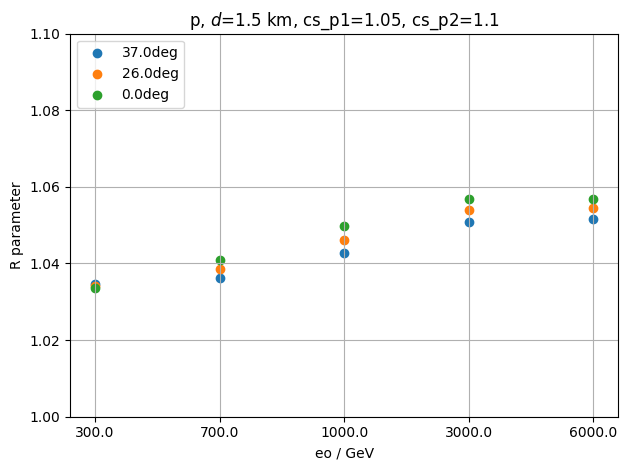

In [19]:
plt.figure()
for i in range(3):
    plt.scatter(e0_values, data_d15_e0[:,i],label=str(np.round(angles[i],decimals=0)) + 'deg')

plt.xlabel('eo / GeV')
plt.ylabel('R parameter')
plt.legend(loc='upper left')
plt.title('p, $d$=1.5 km, cs_p1=1.05, cs_p2=1.1')
plt.ylim(1.,1.1)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_p_thredholde0.png' )

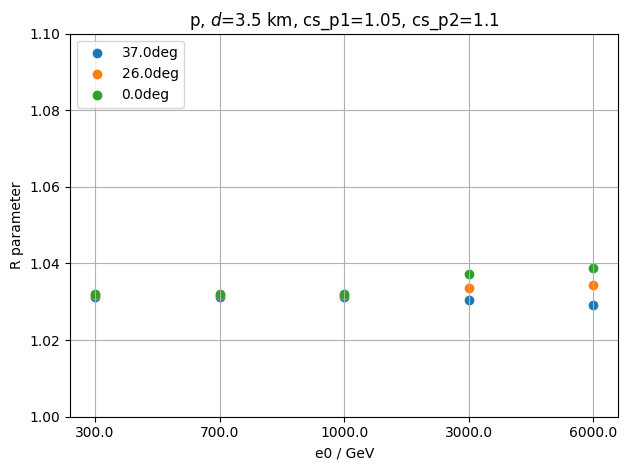

In [21]:
plt.figure()
for i in range(3):
    plt.scatter(e0_values, data_d35_e0[:,i],label=str(np.round(angles[i],decimals=0)) + 'deg')

plt.xlabel('e0 / GeV')
plt.ylabel('R parameter')
plt.legend(loc='upper left')
plt.title('p, $d$=3.5 km, cs_p1=1.05, cs_p2=1.1')
plt.ylim(1.,1.1)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth3.5_p_thredholde0.png' )

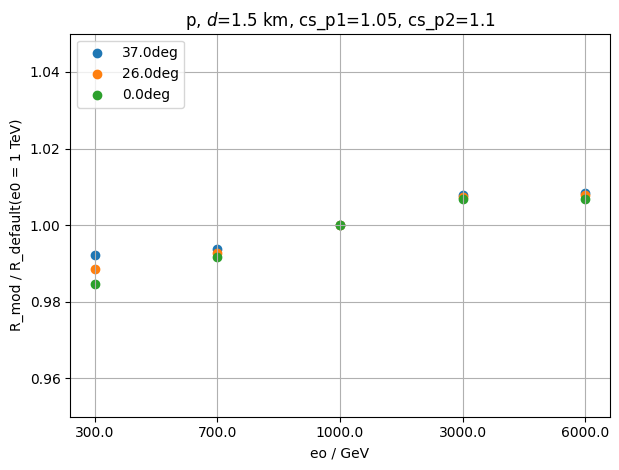

In [24]:
# ratio
plt.figure()
for i in range(3):
    plt.scatter(e0_values, data_d15_e0[:,i]/data_d15_e0[2,i],label=str(np.round(angles[i],decimals=0)) + 'deg')

plt.xlabel('eo / GeV')
plt.ylabel('R_mod / R_default(e0 = 1 TeV)')
plt.legend(loc='upper left')
plt.title('p, $d$=1.5 km, cs_p1=1.05, cs_p2=1.1')
plt.tight_layout()
plt.ylim(0.95,1.05)
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_p_thredholde0_ratio.png' )

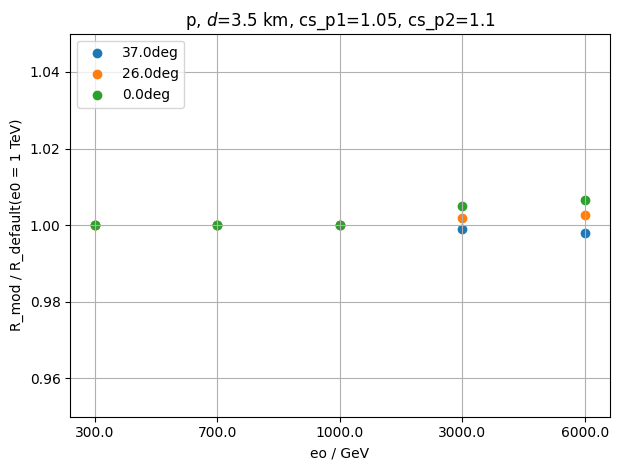

In [25]:
# ratio
plt.figure()
for i in range(3):
    plt.scatter(e0_values, data_d35_e0[:,i]/data_d35_e0[2,i],label=str(np.round(angles[i],decimals=0)) + 'deg')

plt.xlabel('eo / GeV')
plt.ylabel('R_mod / R_default(e0 = 1 TeV)')
plt.legend(loc='upper left')
plt.title('p, $d$=3.5 km, cs_p1=1.05, cs_p2=1.1')
plt.tight_layout()
plt.ylim(0.95,1.05)
plt.grid()
plt.savefig(plot_dir + 'R_depth3.5_p_thredholde0_ratio.png' )